## 3115-Lab Programming Machine Learning

### Lab Exercise 2
**Yuvaraj Prem Kumar, 303384**

### 1.1 Pandas (10 Points)

Dataset Exploration: The 1985 Auto Imports Database is made up of information about the cars that
were imported during the year 1987.

* Load the data using pandas
* Find the mean, median and standard deviation for each NUMERIC Column
* Doing the above is obviously not the most ideal method since it gives no real information.
* Group data by the field 'make'.
    * Find the **average price** , **average highway-mpg** and **average city-mpg** for each make.
    * Use a seaborn pairplot to visualize all int64 data types. Explain the plot, what information can we take out of it.
    * Similar to the first exercise use city-mpg as your dependant variable and engine-size as the independent value. Fit a line, use scatterplot for the data points and plot the line you predicted on top.
    * Comment on the fit and explain if it is a good prediction? if not, why?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Math
%matplotlib inline

From the description provided:

"This data set consists of three types of entities: <br>
(a) the specification of an auto in terms of various characteristics <br>
(b) its assigned insurance risk rating <br>
(c) its normalized losses in use as compared to other cars.<br>
The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price.Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "symboling".  A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
The third factor is the relative average loss payment per insured vehicle year.  This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year."

Most of the preprocessing will be done in Part 1.2. However first we need to load the data and provide the headers. The dataset contains many "?"/NaN values, but instead of dropping them, we can replace those values with the average of other values in that column.

In [38]:
# Loading data with pandas. The column names follow "imports-85.names". 
# There is not much preprocessing steps here, that will be done in Question 1.2

col_names = ['Symboling','Normalized-losses','Make','Fuel-type','Aspiration','Num-of-doors','Body-style','Drive-wheels',
             'Engine-location','Wheel-base','Length','Width','Height','Curb-weight','Engine-type','Num-of-cylinders',
             'Engine-size','Fuel-system','Bore','Stroke','Compression-ratio','Horsepower','Peak-rpm','City-mpg','Highway-mpg',
            'Price']

df = pd.read_csv('imports-85.data',header=None, na_values="?", names=col_names)
df = df.fillna(df.mean())  # Fill missing values with the average of other values [1]
df.head(5)


,Symboling,Normalized-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Engine-size,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
# Calculating mean, median and standard deviation for each numeric column.
# Here we can use pandas function "describe", as by default only numeric fields are returned. [2]

df.describe().loc[[ 'count','mean','50%','std' ]] # 50% is the median

,Symboling,Normalized-losses,Wheel-base,Length,Width,Height,Curb-weight,Engine-size,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212


In [4]:
# Grouping the dataframe by "make" column, with the average, adapted from [3].
# Reset index to keep "Make" as a column instead of index
df2 = df.groupby('Make')['Price', 'Highway-mpg', 'City-mpg'].mean().reset_index()
df2.head(5)  

,Make,Price,Highway-mpg,City-mpg
0,alfa-romero,15498.333333,26.666667,20.333333
1,audi,17194.589908,24.142857,18.857143
2,bmw,26118.750000,25.375000,19.375000
3,chevrolet,6007.000000,46.333333,41.000000
4,dodge,7875.444444,34.111111,28.000000


In [5]:
# Currently the datatypes are "float64", so we need to convert them firstly as per exercise requirement
df2['Price'] = df2['Price'].astype('int64')
df2['Highway-mpg'] = df2['Highway-mpg'].astype('int64')
df2['City-mpg'] = df2['City-mpg'].astype('int64')
df2.dtypes

Make           object
Price           int64
Highway-mpg     int64
City-mpg        int64
dtype: object

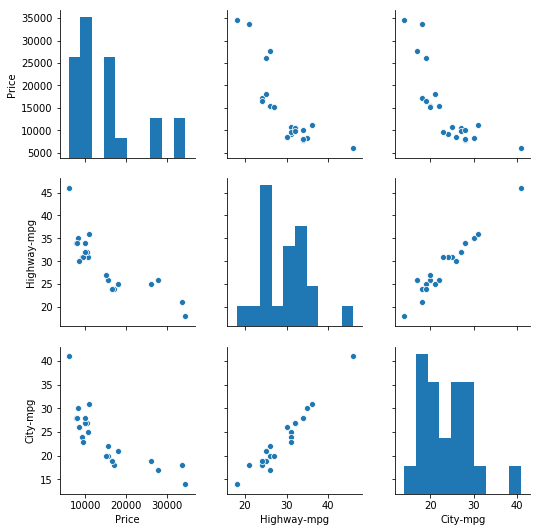

In [6]:
# Seaborn pairplots are adapted from [4]
#sns.pairplot(df2,hue="Make",vars=['Price','Highway-mpg','City-mpg'])
sns.pairplot(df2)

The Seaborn pairplots are showing the numerical data. The histograms show the distribution of each variable (Price, Highway-mpg, City-mpg) indivudally. The scatter plots show the relationships or correlation between the other two variables. [3]. We can see that "Price depends more on the "Make" and less on mpg. However, cars with less mpg appears to be have a higher price. Furthermore, highway-mpg seems to have a higher price compared to city-mpg. Highway-mpg vs city-mpg is closely linearly correlated, so fuel consumption may be almost similar.

In [7]:
# Linear regression of city-mpg (dependant variable) vs engine-size (independant variable)
# Functions taken from my Lab 1 submission

def learn_simple_linreg(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = np.multiply((x - x_mean), (y - y_mean))
    denom = (x - x_mean)**2
    b1 = np.sum(num)/np.sum(denom)
    b0 = y_mean - b1 * x_mean
    return b0, b1


def predict_simple_linreg(x,b0, b1):
    yhat = b0 + x*b1
    return yhat

In [8]:
# Get the values from original dataframe into a list
x = df.loc[:,'Engine-size'].values
print(x[:5])

y = df.loc[:,'City-mpg'].values
print(y[:5])

[130 130 152 109 136]
[21 21 19 24 18]


In [9]:
# Call functions
b0, b1 = learn_simple_linreg(x,y)
yhat = predict_simple_linreg(x,b0,b1)
print("b0 = {} \nb1 = {}".format(b0,b1))
print("yhat = ",yhat[:5])

b0 = 38.25172970058016 
b1 = -0.10269082828332303
yhat =  [24.90192202 24.90192202 22.6427238  27.05842942 24.28577705]


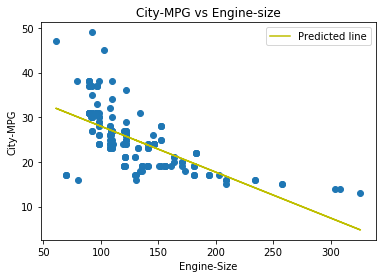

In [10]:
# Plotting the data points and line of best fit
plt.scatter(x,y)
plt.plot(x, yhat, 'y', label='Predicted line')
plt.legend()
plt.title('City-MPG vs Engine-size')
plt.xlabel('Engine-Size')
plt.ylabel('City-MPG')
plt.show()


In [11]:
# This block adapted from [5]
# sum of square of residuals
ssr = np.sum((yhat - y)**2)

#  total sum of squares
sst = np.sum((y - np.mean(y))**2)

# R2 score
r2_score = 1 - (ssr/sst)

print("SSR:", ssr)
print("SST:", sst)
print("R_square score:", r2_score)

SSR: 5000.587073923392
SST: 8731.121951219513
R_square score: 0.42726867155658743


The plot does show somewhat of a linear correlation between Engine size and City MPG, but it's obivous there are many points far away from the line of best-fit. Hence the residual error is also high. We can calculate the Sum of Square and residuals value, including $R^2$ value to see they are quite high as well. It would be better to normalize the data in order to see the values more clearly. Anyway, this model based on only one independant variable is not so good at predicting the City-MPG. Hence it's better to include more independant variable and formulate it as multivariate linear regression model instead.

### 1.2 Linear Regression via Normal Equations (10 Points)

In [157]:
x_data = df.drop('Price', axis=1)  
y_data = df[[ 'Price' ]]  # Target column to be predicted
y_data.head(5)

,Price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


As part of the data preprocessing, we need to choose which columns in $X_{data}$ could be useful in the linear regression model. First, all categorical columns such as "fuel-type", "num-of-doors", and "drive-wheels" are dropped. If we want to use them, we should first convert them by one-hot encoding etc. but these seems like overkill for the little points in this exercise. Hence these columns are not used, however I concede they would be useful in a more in-depth model (with extra steps and processing to do). Next, symboling column is dropped since it's something like an index column which is not useful for this linear model purpose.

From all the continuous data columns, here I decide to limit it to 5 columns for easier processing since it's a small model. The columns selected are good indicators of engine power and full consumption, which are the greater considerations for a car price as compared to the others (except for "Make" but as stated, it's a categorical column so it's dropped). 

Columns selected:
* Compression-ratio
* Horsepower
* Peak-rpm
* City-mpg
* Highway-mpg

In [158]:
x_data = x_data[[ 'Compression-ratio', 'Horsepower', 'Peak-rpm', 'City-mpg', 'Highway-mpg' ]]
x_data.head(5)

,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg
0,9.0,111.0,5000.0,21,27
1,9.0,111.0,5000.0,21,27
2,9.0,154.0,5000.0,19,26
3,10.0,102.0,5500.0,24,30
4,8.0,115.0,5500.0,18,22


As stated in the first part, it's better to normalize the data values, especially when we see so many types of integer values and different ranges. Also after we normalize, it's easier to make comparisons on the RMSE and R$^2$ values.

In [159]:
# Normalize function, adapted from [6]. Min-max normalization of values (to [0-1] range)
def normalize_data(x):
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

In [160]:
x_data = normalize_data(x_data)
x_data.head(5)

,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg
0,0.1250,0.262500,0.346939,0.222222,0.289474
1,0.1250,0.262500,0.346939,0.222222,0.289474
2,0.1250,0.441667,0.346939,0.166667,0.263158
3,0.1875,0.225000,0.551020,0.305556,0.368421
4,0.0625,0.279167,0.551020,0.138889,0.157895


In [161]:
# Based on the ML lecture, we should add the intial bias of "1" as the first column. Code adapted from [7]
# Don't keep running this code without refreshing x_data from intial load. Otherwise it will continously add columns of ones.
x_data = np.hstack([np.ones([x_data.shape[0],1]), x_data])  
print(x_data)
print("\nDimensions of X_data:",x_data.shape)
print("\nDimensions of Y_data:",y_data.shape)

[[1.         0.125      0.2625     0.34693878 0.22222222 0.28947368]
 [1.         0.125      0.2625     0.34693878 0.22222222 0.28947368]
 [1.         0.125      0.44166667 0.34693878 0.16666667 0.26315789]
 ...
 [1.         0.1125     0.35833333 0.55102041 0.13888889 0.18421053]
 [1.         1.         0.24166667 0.26530612 0.36111111 0.28947368]
 [1.         0.15625    0.275      0.51020408 0.16666667 0.23684211]]

Dimensions of X_data: (205, 6)

Dimensions of Y_data: (205, 1)


In [162]:
# Train-test split without Sklearn library, adapted from [8]
mask = np.random.rand(len(x_data)) < 0.8  # This will shuffle the data
x_train, y_train = x_data[mask], y_data[mask]
x_test, y_test = x_data[~mask], y_data[~mask]

print("Train set observations: ", len(x_train))
print("Test set observations: ", len(x_test))

Train set observations:  165
Test set observations:  40


**learn-linreg-NormEq** algorithm is following the lecture slides in [9]:

<img src="https://i.imgur.com/py5ldxc.jpg" style="height:160px">

Here, we learn the parameter value $\beta$ for $X_{train}$ in order to predict the target values, i.e $Y_{test}$

In line 6, **solve-sle** is implemented via two methods (i) Gaussian elimination and (ii) QR decomposition.

In [163]:
"""
Gaussion elimination uses sequence of row operations on the matrix,
in order to return the upper triangular matrix, in row echelon form
"""
# Outer function
def learn_linreg_gaussian(X, y):  # Returns an array for the beta values of each predictor variable
    A = np.matrix(X.T) * np.matrix(X)  # Transpose as per algorithm
    b = np.matrix(X.T) * np.matrix(y)
    beta = solve_sle_gaussian(A, b)
    return beta

In [164]:
# Gaussian elimination without scipy, code adapted from [10]
def solve_sle_gaussian(A, b):
    n = len(A)
    A = np.column_stack((A,b))

    for i in range(0, n):
        # Search for maximum in this column
        maxEl = abs(A[i,i])
        maxRow = i
        for k in range(i+1, n):
            if abs(A[k,i]) > maxEl:
                maxEl = abs(A[k,i])
                maxRow = k

        # Swap maximum row with current row (column by column)
        for k in range(i, n+1):
            tmp = A[maxRow,k]
            A[maxRow,k] = A[i,k]
            A[i,k] = tmp

        # Make all rows below this one 0 in current column
        for k in range(i+1, n):
            c = -A[k,i]/A[i,i]
            for j in range(i, n+1):
                if i == j:
                    A[k,j] = 0
                else:
                    A[k,j] += c * A[i,j]

    # Solve equation Ax=b for an upper triangular matrix A
    x = [0 for i in range(n)]
    for i in range(n-1, -1, -1):
        x[i] = A[i,n]/A[i,i]
        for k in range(i-1, -1, -1):
            A[k,n] -= A[k,i] * x[i]
    return x

In [165]:
# Calculating beta coefficients via Gaussian elimination method
betas_1 = learn_linreg_gaussian(x_train,y_train)
print("Beta coefficients:", betas_1)

Beta coefficients: [12562.541301364472, 7227.072335415789, 25186.872755037934, -3954.2413425665195, 7652.676995040864, -20276.668167189036]


In [166]:
"""
QR decomposition is decomposition the of a matrix into a product A = QR of an orthogonal matrix Q 
and an upper triangular matrix R. It is used to solve the linear least squares problem also.
"""
# Outer function
def learn_linreg_qrd(X, y):  # Returns an array for the beta values of each predictor variable
    A = np.matrix(X.T) * np.matrix(X)  # Transpose as per algorithm
    b = np.matrix(X.T) * np.matrix(y)
    beta = solve_sle_qrd(A, b)
    return beta


# Inner function for solve_sle
# QR decomposition without scipy, code adapted from [11]
def solve_sle_qrd(A, b):
    beta = np.linalg.inv(A)
    beta = np.matmul(beta, b)
    beta = np.array(beta).T[0]
    return beta

In [167]:
# Find betas by QRD method
betas_2 = learn_linreg_qrd(x_train,y_train)
print("Beta coefficients:", betas_2)

Beta coefficients: [ 12562.54130136   7227.07233542  25186.87275504  -3954.24134257
   7652.67699504 -20276.66816719]


We can see that the $\beta$ values for both methods are quite similar. In fact, the difference is in many decimal places only.

For predicted values of $\hat{y}$, the formula is $\hat{y}$ = $\hat{\beta_0} + \sum{\hat{\beta_m}x_m}$ which we can put into a matrix representation based on the calculated beta values, and $X_{test}$ dataset.

In [168]:
def predict_y(X, beta):
    yhat = np.matmul(X, beta).round(4).T
    return yhat

In [169]:
# Predicted values for Gaussian elimination method, showing sample output
yhat_1 = predict_y(x_test,betas_1)
print(yhat_1[:5])

[14536.6328 19157.7287 12273.7626 19573.6915 11463.6162]


In [170]:
# Predicted values for OR decomposition method, showing sample output
yhat_2 = predict_y(x_test, betas_2)
print(yhat_2[:5])

[14536.6328 19157.7287 12273.7626 19573.6915 11463.6162]


Due to the similar $\beta$ coefficients calculated earlier, the $\hat{y}$ values for both methods are also similar.

In order to check model performance, we can plot the residual and calcuate the RMSE. Residual, $e$ is calcuated as the absolute value of $y_{test}$$-\tilde{y}$.

In [171]:
# Residual plots show the difference between actual and predicted value for y
def residual(y_test, y_hat):
    y_test = y_test.to_numpy()  # Flatten dataframe column to numpy to list
    y_test = y_test.ravel()
    res = y_test - y_hat
    res = np.absolute(res)
    avg_res = np.mean(res)
    return y_test, res, avg_res

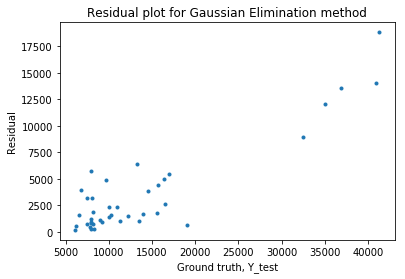

Average residual for Gaussian Elimination method: 3583.4744836691543


In [172]:
# For GE method
ytest, res_ge, avg_res_ge = residual(y_test, yhat_1)

plt.plot(ytest, res_ge, '.')
plt.title("Residual plot for Gaussian Elimination method")
plt.xlabel('Ground truth, Y_test')
plt.ylabel('Residual')
plt.show()

print("Average residual for Gaussian Elimination method:", avg_res_ge)

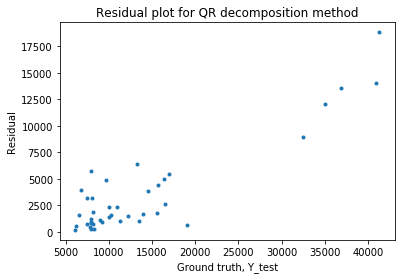

Average residual for Gaussian Elimination method: 3583.4744836691543


In [183]:
# For QRD
ytest2, res_qrd, avg_res_qrd = residual(y_test, yhat_2)

plt.plot(ytest2, res_qrd, '.')
plt.title("Residual plot for QR decomposition method")
plt.xlabel('Ground truth, Y_test')
plt.ylabel('Residual')
plt.show()

print("Average residual for Gaussian Elimination method:", avg_res_qrd)

Again due to the practically similar values (except for negative expotential differences), the average residual and residual plot for the two methods are the equal.

In [180]:
# Root mean square error function
def rmse(y_test, yhat):
    y_test = y_test.to_numpy()  # Flatten dataframe column to numpy to list
    y_test = y_test.ravel()
    rmse = np.sqrt(np.mean(np.square(y_test - yhat)))
    return rmse

In [184]:
rmse_ge = rmse(y_test, yhat_1)
print("RMSE for Gaussian Elimination method:", rmse_ge)

rmse_qrd = rmse(y_test, yhat_2)
print("RMSE for QR decomposition method:", rmse_qrd)

RMSE for Gaussian Elimination method: 5542.947582538135
RMSE for QR decomposition method: 5542.947582538135


Again we see that the RMSE values are similar in this case. One point to note is that the RMSE values are very large, so we can run the model for more iterations to obtain better values of $\beta$ coefficients using gradient descent etc. Also, we could incorporate all the variables, continuous and categorial, in order to lower the RMSE and improve test accuracy.

## References:

[1] https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns<br>
[2] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html  <br>
[3] https://stackoverflow.com/questions/46938572/pandas-groupby-mean-into-a-dataframe <br>
[4] https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166 <br>
[5] https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2 <br>
[6] https://github.com/deep-diver/CIFAR10-img-classification-tensorflow/blob/master/CIFAR10_image_classification.ipynb <br>
[7] https://datascience.stackexchange.com/questions/24759/how-to-add-bias-consideration-into-logistic-regression-code <br>
[8] https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas <br>
[9] https://www.ismll.uni-hildesheim.de/lehre/ml-14w/script/ml-02-A1-linear-regression.pdf <br>
[10] https://martin-thoma.com/solving-linear-equations-with-gaussian-elimination/ <br>
[11] https://medium.com/italiandirectory-publishing/linear-equations-with-python-the-qr-decomposition-66a48b8be89d <br>